In [1]:
import requests
import pandas as pd

In [2]:
# Fetch historical data for multiple cryptocurrencies
def fetch_crypto_data(crypto_id, days='365'):
    url = f'https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart'
    params = {'vs_currency': 'usd', 'days': days}
    response = requests.get(url, params=params)
    data = response.json()
    prices = pd.DataFrame(data['prices'], columns=['timestamp', f'{crypto_id}_price'])
    prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')
    return prices

In [3]:
# Fetch data for BTC, ETH, and LTC
btc_data = fetch_crypto_data('bitcoin')
eth_data = fetch_crypto_data('ethereum')
ltc_data = fetch_crypto_data('litecoin')

In [4]:
# Merge datasets
merged_data = btc_data.merge(eth_data, on='timestamp').merge(ltc_data, on='timestamp')
merged_data.set_index('timestamp', inplace=True)

print(merged_data.head())

            bitcoin_price  ethereum_price  litecoin_price
timestamp                                                
2024-02-21   52286.793726     3015.438952       69.677399
2024-02-22   51842.756766     2977.082017       68.987025
2024-02-23   51319.500126     2974.131586       68.813409
2024-02-24   50841.081095     2926.285913       68.774214
2024-02-25   51553.096713     2988.317384       70.372638


In [5]:
# Calculate daily returns
merged_data['BTC_Returns'] = merged_data['bitcoin_price'].pct_change()
merged_data['ETH_Returns'] = merged_data['ethereum_price'].pct_change()
merged_data['LTC_Returns'] = merged_data['litecoin_price'].pct_change()

In [6]:
# Drop missing values
merged_data.dropna(inplace=True)

print(merged_data.head())

            bitcoin_price  ethereum_price  litecoin_price  BTC_Returns  \
timestamp                                                                
2024-02-22   51842.756766     2977.082017       68.987025    -0.008492   
2024-02-23   51319.500126     2974.131586       68.813409    -0.010093   
2024-02-24   50841.081095     2926.285913       68.774214    -0.009322   
2024-02-25   51553.096713     2988.317384       70.372638     0.014005   
2024-02-26   51751.884055     3113.408298       70.092499     0.003856   

            ETH_Returns  LTC_Returns  
timestamp                             
2024-02-22    -0.012720    -0.009908  
2024-02-23    -0.000991    -0.002517  
2024-02-24    -0.016087    -0.000570  
2024-02-25     0.021198     0.023242  
2024-02-26     0.041860    -0.003981  


In [7]:
# Compute correlation matrix
correlation_matrix = merged_data[['BTC_Returns', 'ETH_Returns', 'LTC_Returns']].corr()
print(correlation_matrix)

             BTC_Returns  ETH_Returns  LTC_Returns
BTC_Returns     1.000000     0.792618     0.517331
ETH_Returns     0.792618     1.000000     0.585083
LTC_Returns     0.517331     0.585083     1.000000


Visualize The Correlation Matrix

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

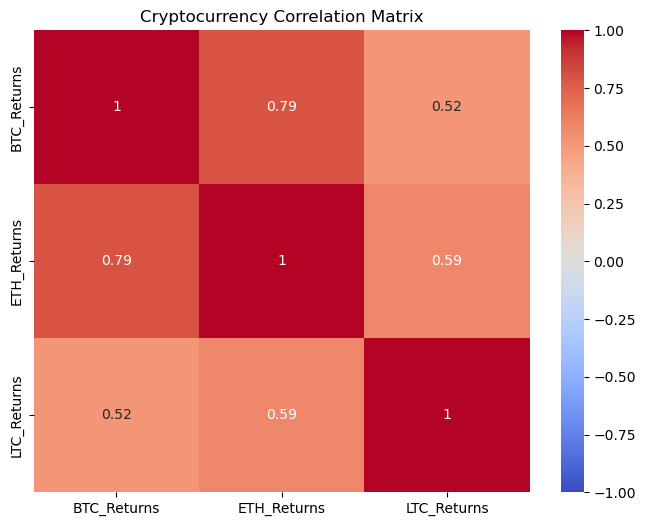

In [10]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Cryptocurrency Correlation Matrix')
plt.show()

Intrepretation 

- HIGH CORRELATION (>0.7)
- LOW CORRELATION (<0.3)
- NEGATIVE CORRELATION (<0)

In [12]:
# Calculate rolling correlation (30-day window)
rolling_corr = merged_data['BTC_Returns'].rolling(window=30).corr(merged_data['ETH_Returns'])

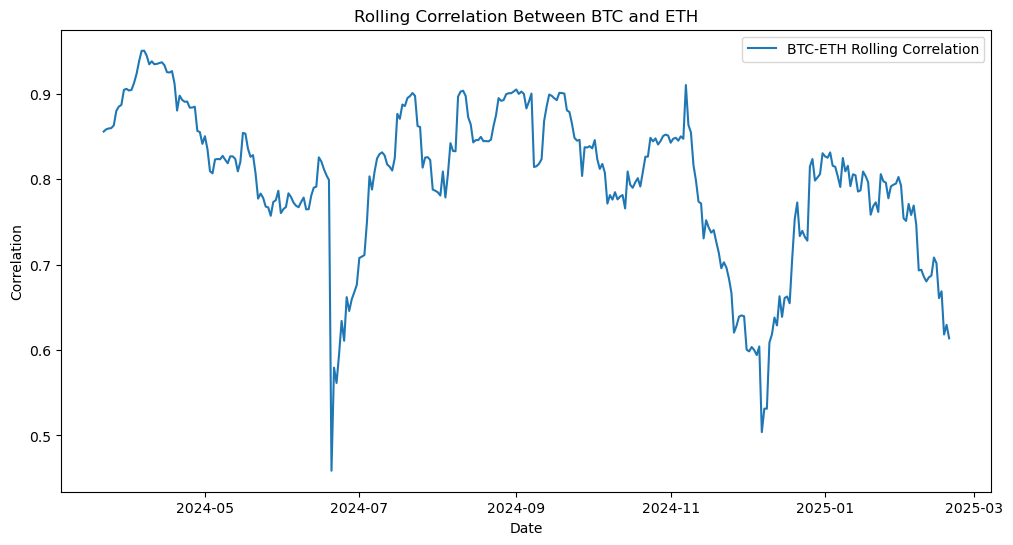

In [13]:
# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='BTC-ETH Rolling Correlation')
plt.title('Rolling Correlation Between BTC and ETH')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
# Compute linkage matrix
linkage_matrix = linkage(correlation_matrix, method='ward')


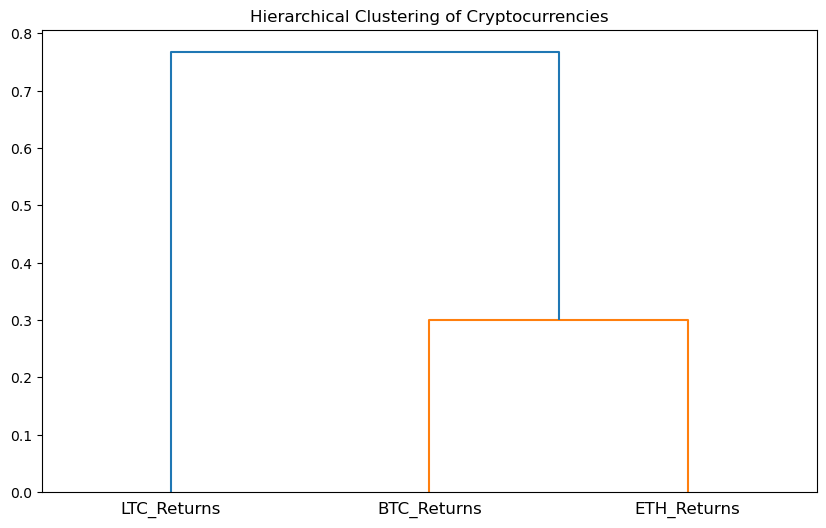

In [16]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=correlation_matrix.columns)
plt.title('Hierarchical Clustering of Cryptocurrencies')
plt.show()